In [542]:
import numpy as np
import matplotlib.pyplot as plt

# Goals

Understand the basic principles underlying:

- Supervised training
- Gradient descent
- Training set vs test set
- Hyperparameters

# TODO

The most important goal is to understand.

At each part of the notebook, you will find hyper-parameters. Your task is to change these hyper-parameters and study their effect.

1 Dataset

Visualize the data and understand the task.

Hyper-parameters to change: 
- size of the dataset
- strength of the noise
- proportion of train vs test examples


2 Model

Test how the model matches the data.

Hyper-parameters to change: 
- W_0

3 Training

Train the model and test it, first by showing the dataset all at once, then by showing examples one by one.

Hyper-parameters to change: 
- number of epochs
- learning rate


To go further: Make the dataset more complex and make the model more complex

# 1 Dataset

## 1.1 Dataset generation

We generate a dataset. 

- 'size_dataset' is the total number of examples we have

- 'x' is all the input examples. Here they are randomly taken between 0 and 1.

- 'targets' is all the target (i.e. desired outputs). 

Here we choose targets = x * constant + noise for teaching purposes. In real cases, we do not know the relationship between x and targets.

In [543]:
size_dataset = 100 
x = np.random.random(size_dataset)
slope = 2.5
noise = 0.5
targets = x * slope + noise * (np.random.random(size_dataset) - 0.5)

## 1.2 Train versus test

We split the dataset into the train and test sets.

- "split_train_test" is the number of examples in the training set.
- "train_x" and "train_targets" are the examples of inputs and targets for the training set.
- "test_x" and "test_targets" are the examples of inputs and targets for the test set.

We plot the dataset as "targets" versus "x", with the training set in blue and the test set in green. 

Note that the points of the train and test sets are different, even if they come from the same distribution.

The goal is to be able to model the test set while learning from the training set (generalization).

In [544]:
split_train_test = int(size_dataset / 2)
train_x, train_targets = x[0:split_train_test], targets[0:split_train_test]
test_x, test_targets = x[split_train_test:], targets[split_train_test:]

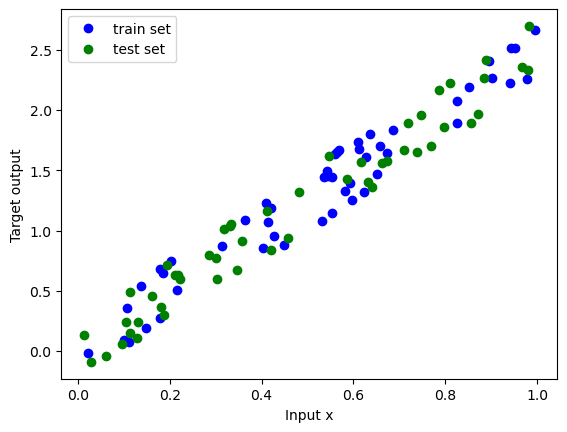

In [545]:
fig, ax = plt.subplots(1, 1)
ax.plot(train_x, train_targets, 'o', color='blue', label='train set')  
ax.plot(test_x, test_targets, 'o', color='green', label='test set')   
ax.set_xlabel("Input x")
ax.set_ylabel("Target output")
ax.legend()
plt.show()

# 2 Model (network)

We create our "model".

Here it is extremely simple, it is just a multiplication of the input by a weight W.

W is the only trainable parameter. We set it to an arbitrary initial value.

In [546]:
W_0 = 1 # random initial value for the parameter to train

The "forward" function is what the model computes, i.e. output = f(input, parameters)

In [547]:
def forward(W, inputs):
    outputs = W*inputs
    return outputs

Let's look how our model performs when it has not yet been trained.

In [548]:
outputs = forward(W_0, train_x)

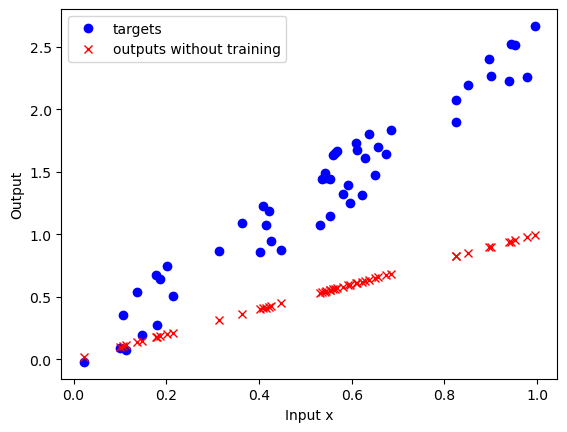

In [549]:
fig, ax = plt.subplots(1, 1)
ax.plot(train_x, train_targets, 'o', color='blue', label='targets')  
ax.plot(train_x, outputs, 'x', color='red', label='outputs without training')   
ax.set_xlabel("Input x")
ax.set_ylabel("Output")
ax.legend()
plt.show()

We quantify the performance using a loss function.

Here we choose the Mean Square Error (MSE). 

You can try other losses.

In [550]:
def loss_function(outputs, true_outputs):
    loss = np.mean((outputs - true_outputs)**2)
    return loss

In [551]:
loss = loss_function(outputs, train_targets)
print(f'Before training, the loss train is {loss:.3f}')

Before training, the loss train is 0.846


# 3 Training

Now we are going to train our model.

We define a function to compute the gradient of the loss regarding the parameter W.

In [552]:
def grad_loss_vs_W(inputs, outputs, true_outputs):
    grad = np.mean(2 * (outputs - true_outputs) * inputs)
    return grad

We choose a number of epochs and a learning rate

## 3.1 Batch training

We start with a first training method, where the loss and gradients are computed as an average over the whole training set.

We chose the number of eopchs (i.e. how many time whe show the whole training set to the network) and the learning rate. 

These are important parameters for our training, but they are not trained themselves. They are chosen by trial and error, experience and more refined optimization algorithms. We call them "hyperparameters".

In [553]:
n_epochs = 10
learning_rate = 0.5

### 3.1.1 Train the network

We will record the evolution of the parameter W, the loss and the gradient updates.

In [554]:
W_evolution = np.zeros(n_epochs+1)
W_evolution[0] = W_0
loss_evolution = np.zeros(n_epochs+1)
grad_W_evolution = np.zeros(n_epochs+1)

Now let's do the learning!

For each epoch we:

- show the whole training dataset to the model
- compute the outputs, with the current value of W
- compute the loss, using the outputs and targets
- compute the gradient of the loss regarding W
- update the value of W using the gradient
- record the relevant values

In [555]:
for epoch in range(n_epochs):
    W = W_evolution[epoch]  # current value of W
    outputs = forward(W, train_x)  # the model computes outpus
    loss = loss_function(outputs, train_targets)  # the loss
    loss_evolution[epoch] = loss  # record the loss
    
    grad_W = grad_loss_vs_W(train_x, outputs, train_targets)  # the gradient of the loss regarding W
    grad_W_evolution[epoch] = grad_W  # record the gradient
 
    W = W - learning_rate * grad_W  # update W
    W_evolution[epoch+1] = W  # record the new value of W
    
    print(f'Epoch {epoch}: W = {W:.3f}, loss = {loss:.3f}, grad_W = {grad_W:.3f}')

Epoch 0: W = 1.534, loss = 0.846, grad_W = -1.067
Epoch 1: W = 1.882, loss = 0.376, grad_W = -0.697
Epoch 2: W = 2.109, loss = 0.175, grad_W = -0.455
Epoch 3: W = 2.258, loss = 0.090, grad_W = -0.297
Epoch 4: W = 2.355, loss = 0.053, grad_W = -0.194
Epoch 5: W = 2.418, loss = 0.038, grad_W = -0.126
Epoch 6: W = 2.459, loss = 0.031, grad_W = -0.083
Epoch 7: W = 2.486, loss = 0.028, grad_W = -0.054
Epoch 8: W = 2.504, loss = 0.027, grad_W = -0.035
Epoch 9: W = 2.515, loss = 0.027, grad_W = -0.023


The final value of the loss on the training set

In [556]:
outputs = forward(W_evolution[-1], train_x)
loss = loss_function(outputs, train_targets)
loss_evolution[-1] = loss  # final loss value
grad_W_evolution[-1] = np.nan

print(f'The value of the training loss after training is {loss:.3f}')

The value of the training loss after training is 0.026


Let's look how our network does on the data.

Is it good enough? If not, change the learning rate or train for more epochs.

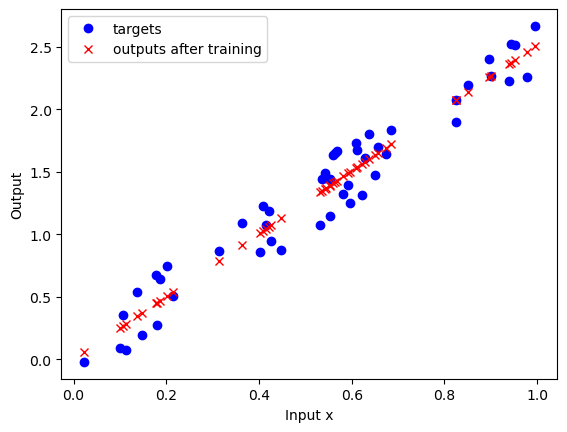

In [557]:
fig, ax = plt.subplots(1, 1)
ax.plot(train_x, train_targets, 'o', color='blue', label='targets')  
ax.plot(train_x, outputs, 'x', color='red', label='outputs after training')   
ax.set_xlabel("Input x")
ax.set_ylabel("Output")
ax.legend()
plt.show()

Here we look at the evolution of the parameter W, it's gradient and the loss.

What do you observe?

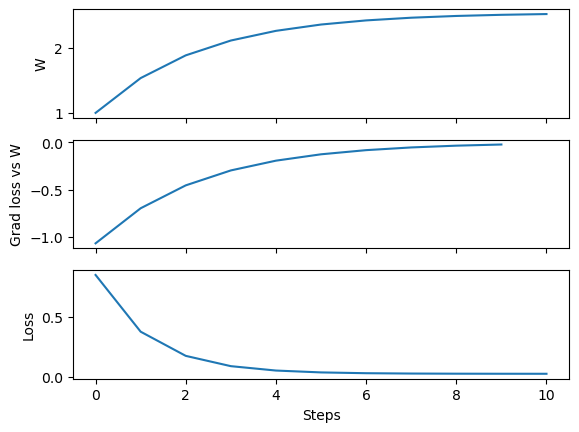

In [558]:
fig, ax = plt.subplots(3, 1, sharex=True)
ax[0].plot(W_evolution) 
ax[0].set_ylabel("W")
ax[1].plot(grad_W_evolution) 
ax[1].set_ylabel("Grad loss vs W")
ax[2].plot(loss_evolution)
ax[2].set_ylabel("Loss")
ax[2].set_xlabel("Steps")
plt.show()

### 3.1.2 Test the trained model

Now that the training is complete, we will test the model on data not yet seen by the model, i.e. the test set.

In [559]:
test_outputs = forward(W_evolution[-1], test_x)
loss = loss_function(test_outputs, test_targets)

print(f'The value of the test loss after training is {loss:.3f}')

The value of the test loss after training is 0.026


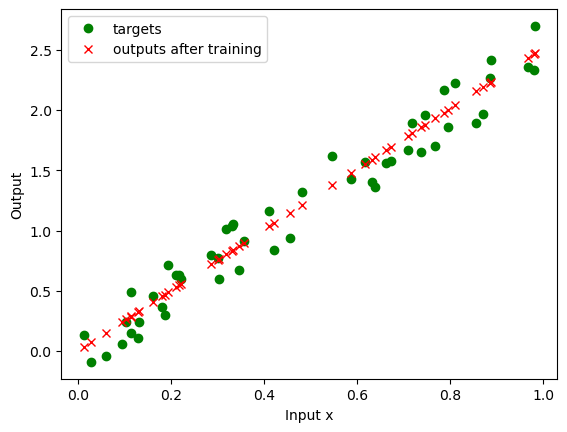

In [560]:
fig, ax = plt.subplots(1, 1)
ax.plot(test_x, test_targets, 'o', color='green', label='targets')  
ax.plot(test_x, test_outputs, 'x', color='red', label='outputs after training')   
ax.set_xlabel("Input x")
ax.set_ylabel("Output")
ax.legend()
plt.show()

### 3.1.3 Loss landscape

Let's look at how the loss depends on the parameter W, and how W evolves toward the minimum during training.

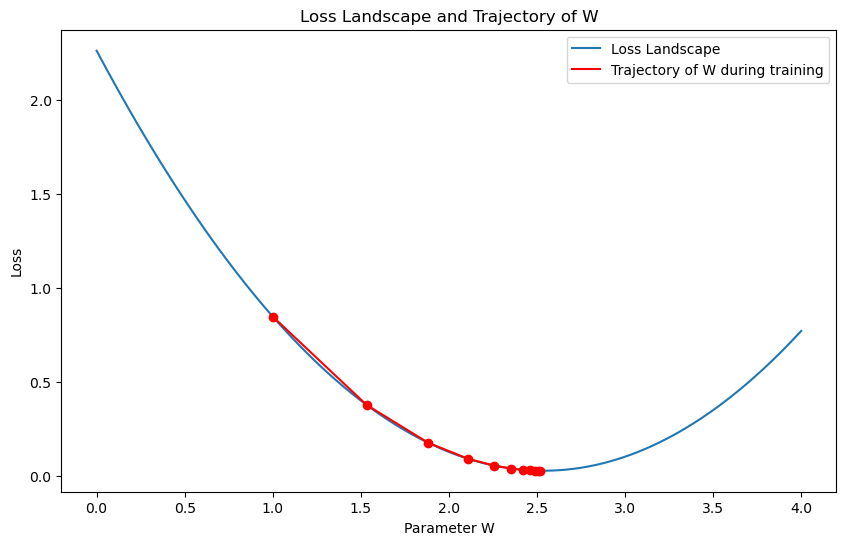

In [561]:
# Range of W values for plotting the landscape
W_values = np.linspace(0, 4, 400)
loss_values = np.array([loss_function(forward(W, train_x), train_targets) for W in W_values])

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(W_values, loss_values, label='Loss Landscape')
ax.scatter(W_evolution, loss_evolution, color='red', zorder=5)  # Higher zorder to plot on top
ax.plot(W_evolution, loss_evolution, color='red', label='Trajectory of W during training')

ax.set_xlabel('Parameter W')
ax.set_ylabel('Loss')
ax.legend()
plt.title('Loss Landscape and Trajectory of W')
plt.show()

## 3.2 Stochastic gradient descent

Now, instead of showing the whole training set to compute the gradient and update the weight, we show one example then update the weight, then show another example and so on.

### 3.2.2 Train

As we use a new method, you will need to change the hyperparameters (number of epochs and learning rate)

In [562]:
n_epochs = 10
learning_rate = 0.5

Epoch 0: W = 2.233, loss = 0.017, grad_W = 0.145
Epoch 1: W = 2.233, loss = 0.017, grad_W = 0.145
Epoch 2: W = 2.233, loss = 0.017, grad_W = 0.145
Epoch 3: W = 2.233, loss = 0.017, grad_W = 0.145
Epoch 4: W = 2.233, loss = 0.017, grad_W = 0.145
Epoch 5: W = 2.233, loss = 0.017, grad_W = 0.145
Epoch 6: W = 2.233, loss = 0.017, grad_W = 0.145
Epoch 7: W = 2.233, loss = 0.017, grad_W = 0.145
Epoch 8: W = 2.233, loss = 0.017, grad_W = 0.145
Epoch 9: W = 2.233, loss = 0.017, grad_W = 0.145


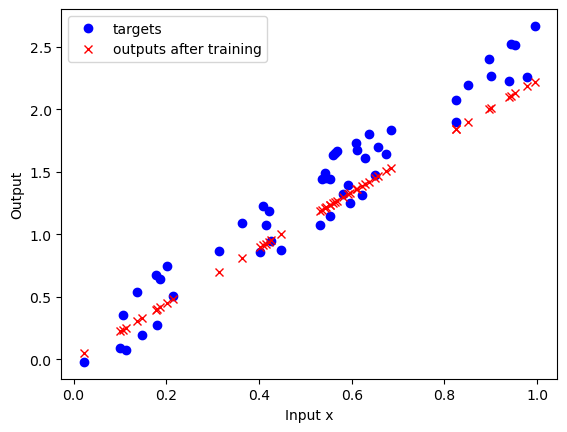

The value of the training loss after training is 0.058


In [563]:
W_evolution = np.zeros(n_epochs*split_train_test +1)
W_evolution[0] = W_0
loss_evolution = np.zeros(n_epochs*split_train_test +1)
grad_W_evolution = np.zeros(n_epochs*split_train_test +1)

i = 0
for epoch in range(n_epochs):
    W = W_evolution[i]  # current value of W
    for n in range(split_train_test):
        x = train_x[n]
        target = train_targets[n]
        output = forward(W, x)  # the model computes outpus
        loss = loss_function(output, target)  # the loss
        loss_evolution[i] = loss  # record the loss

        grad_W = grad_loss_vs_W(x, output, target)  # the gradient of the loss regarding W
        grad_W_evolution[i] = grad_W  # record the gradient

        W = W - learning_rate*grad_W  # update W
        W_evolution[i+1] = W  # record the new value of W
        
        i = i +1
    
    print(f'Epoch {epoch}: W = {W:.3f}, loss = {loss:.3f}, grad_W = {grad_W:.3f}')
    
outputs = forward(W_evolution[-1], train_x)
loss = loss_function(outputs, train_targets)
loss_evolution[-1] = loss  # final loss value
grad_W_evolution[-1] = np.nan


fig, ax = plt.subplots(1, 1)
ax.plot(train_x, train_targets, 'o', color='blue', label='targets')  
ax.plot(train_x, outputs, 'x', color='red', label='outputs after training')   
ax.set_xlabel("Input x")
ax.set_ylabel("Output")
ax.legend()
plt.show()

print(f'The value of the training loss after training is {loss:.3f}')

Examine the evolution of the loss, parameter and gradient.

What do you observe?

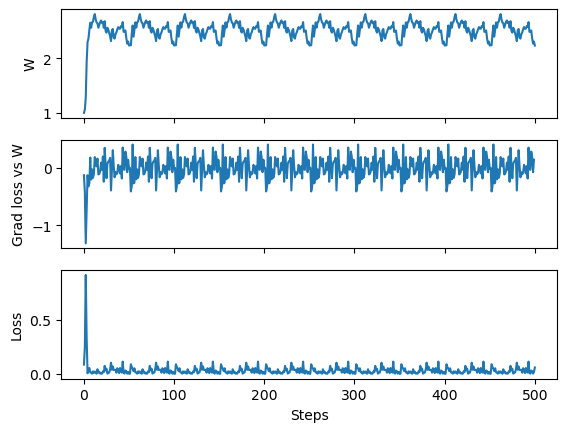

In [564]:
fig, ax = plt.subplots(3, 1, sharex=True)
ax[0].plot(W_evolution) 
ax[0].set_ylabel("W")
ax[1].plot(grad_W_evolution) 
ax[1].set_ylabel("Grad loss vs W")
ax[2].plot(loss_evolution)
ax[2].set_ylabel("Loss")
ax[2].set_xlabel("Steps")
plt.show()

### 3.2.2 Test

The value of the test loss after training is 0.043


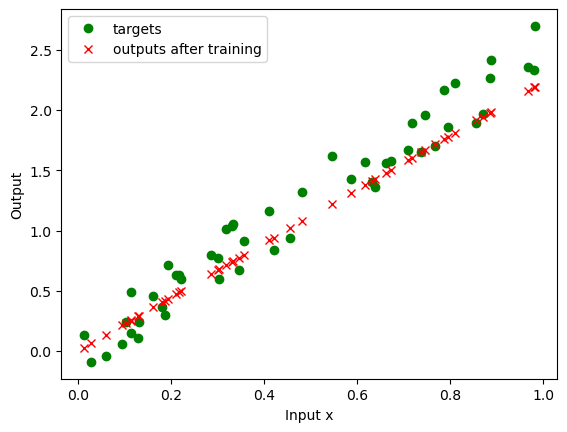

In [565]:
test_outputs = forward(W_evolution[-1], test_x)
loss = loss_function(test_outputs, test_targets)

print(f'The value of the test loss after training is {loss:.3f}')

fig, ax = plt.subplots(1, 1)
ax.plot(test_x, test_targets, 'o', color='green', label='targets')  
ax.plot(test_x, test_outputs, 'x', color='red', label='outputs after training')   
ax.set_xlabel("Input x")
ax.set_ylabel("Output")
ax.legend()
plt.show()

### 3.2.3 Loss landscape

Let's look at how the loss depends on the parameter W, and how W evolves toward the minimum during training.

How does it compare to the batch case?

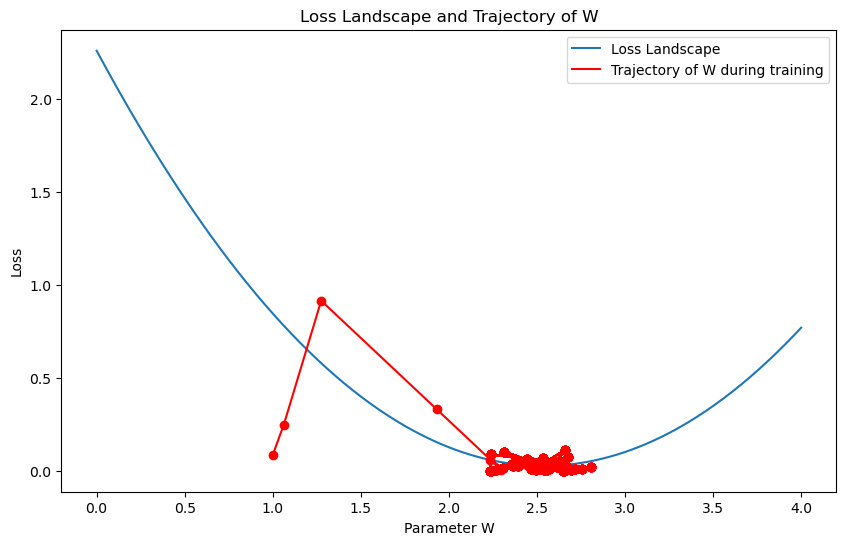

In [566]:
# Range of W values for plotting the landscape
W_values = np.linspace(0, 4, 400)
loss_values = np.array([loss_function(forward(W, train_x), train_targets) for W in W_values])

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(W_values, loss_values, label='Loss Landscape')
ax.scatter(W_evolution, loss_evolution, color='red', zorder=5)  # Higher zorder to plot on top
ax.plot(W_evolution, loss_evolution, color='red', label='Trajectory of W during training')

ax.set_xlabel('Parameter W')
ax.set_ylabel('Loss')
ax.legend()
plt.title('Loss Landscape and Trajectory of W')
plt.show()

# 4 Further work

Copy this notebook and do the work again, choosing a mode complex function for the model and/or more parameters.

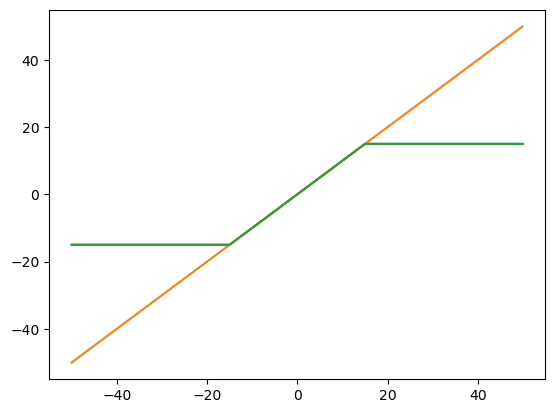

In [567]:
W = 1

def forward(W, inputs):
    outputs = W*inputs
    return outputs

# Définition d'un Dataset
input_range = np.arange(-50, 50, 0.1)
Vsat = 15

output_values = np.where(input_range > Vsat, Vsat, np.where(input_range < -Vsat, -Vsat, input_range))
dataset = np.column_stack((input_range, output_values))
outputs = forward(W_0, train_x)



plt.plot(input_range,output_values)
plt.plot(input_range,dataset)
plt.show()




